# Filtering and replot fgsea results

Alan Lorenzetti 20240415

This script is largely based on the code generated by Hunter Giles upstream.

# Load Packages

In [1]:
library(tidyverse)
library(ggpubr)
save_plot <- function(p, fn, w, h){
    for(ext in c(".pdf", ".png")){
        ggsave(filename=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
if(!dir.exists("../_m")){
    dir.create('../_m', showWarnings = TRUE, recursive = TRUE)
}
setwd('../_m')

In [3]:
getwd()

[1] "/dcs05/lieber/apaquola/users/alorenzetti/xdp_striatal_organoids_RNA-seq/analysis_speaqeasy/deseq2_multiplemodels_genes_no_lfcShrink_filter_low/gsea/filter_results/_m"

In [4]:
# loading upstream results
# and filtering
# pathways to be include
my_paths = c("GOBP_DETECTION_OF_CHEMICAL_STIMULUS",
             "GOBP_PIRNA_PROCESSING",
             "GOBP_POSITIVE_REGULATION_OF_CELL_PROJECTION_ORGANIZATION",
             "GOBP_RNA_SPLICING",
             "GOBP_REGULATION_OF_PROTEASOMAL_PROTEIN_CATABOLIC_PROCESS",
             "GOBP_SYNAPTIC_TRANSMISSION_GLUTAMATERGIC",
             "GOBP_REGULATION_OF_NEURON_PROJECTION_DEVELOPMENT",
             "GOBP_HISTONE_MODIFICATION")

df = read_tsv("../../_m/Patient_v_Control_GOresults.tsv") %>%
    dplyr::filter(pathway %in% my_paths)

dim(df)

length(my_paths)

Rows: 4684 Columns: 8


── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): pathway, leadingEdge
dbl (6): pval, padj, log2err, ES, NES, size



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 8 8

[1] 8

In [5]:
# plotting
colrs = setNames(c("darkgrey", "firebrick2"),
             c("FALSE", "TRUE"))

dot_plot_go = ggplot(df, aes(reorder(pathway, NES), NES)) +
        geom_point( aes(fill = padj < 0.05, size = size), shape=21) +
        scale_fill_manual(values = colrs ) +
        scale_size_continuous(range = c(2,10)) +
        geom_hline(yintercept = 0) +
        coord_flip() +
        labs(x = "Pathway", y = "Normalized Enrichment Score",
           title = "Enriched GO Pathways") + 
        theme_pubr() +
        theme(legend.position = "bottom", plot.margin = unit(c(0.15,0.8,0.15,0.15), "cm"))

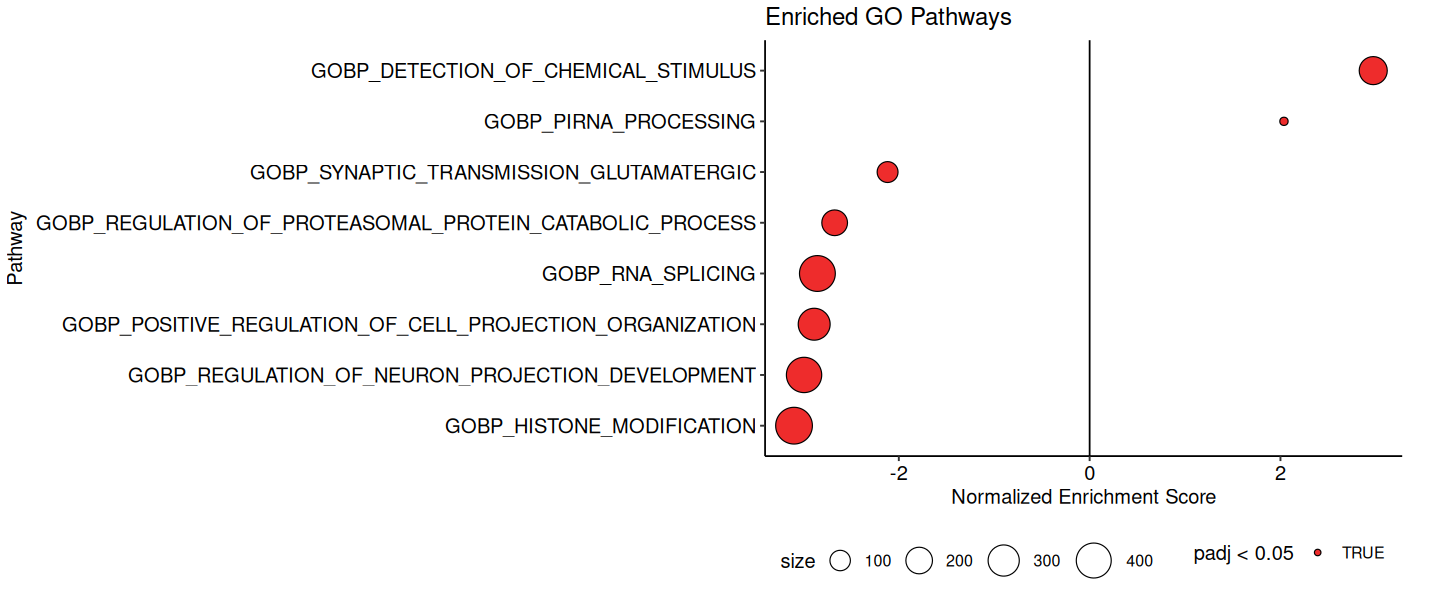

In [6]:
options(repr.plot.width = 12, repr.plot.height = 5)
dot_plot_go
ggsave(filename = "Patient_v_Control_GOresults__filtered.pdf",
       plot = dot_plot_go,
       width = 12,
       height = 5)

In [7]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Arch Linux

Matrix products: default
BLAS:   /usr/lib/libblas.so.3.12.0 
LAPACK: /usr/lib/liblapack.so.3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: EST
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggpubr_0.6.0    lubridate_1.9.4 forcats_1.0.0   stringr_1.5.1  
 [5] dplyr_1.1.4     purrr_1.0.2     readr_2.1.5     tidyr_1.3.1    
 [9] tibble_3.2.1    ggplot2_3.5.1   tidyverse_2.0.0

loaded via a namespace (and not attached):
 [1] generics_0.1.3    rstatix_0.7.2     string